##Проект: __Оценка среднего еженедневного времени учебы студентов в университете с использованием Бутстрэпа__



###__Цель проекта:__
Исследовать среднее время, которое студенты университета тратят на учебу ежедневно, с использованием метода бутстрэпа для получения более устойчивой оценки и создания доверительных интервалов. Учитывая репрезентативность выборки, цель проекта - предоставить статистически обоснованную оценку среднего времени учебы для генеральной совокупности студентов.


###__Данные:__
Мы используем репрезентативную выборку из 20 студентов, в которой измерено время учебы в часах


###__Контекст:__
Я исследовал уровень образования студентов в университете и заинтересовался, сколько времени они обычно тратят на учебу ежедневно. Однако, у меня есть ограниченный доступ к данным исследования и я хотели бы использовать бутстрэп для получения более устойчивой оценки.



---
__Бутстрэп__ - это метод статистической ресемплировании, который позволяет оценить распределение статистик путем многократного выбора случайных подвыборок из имеющегося набора данных с возвращением. В нашем случае, мы создаем множество подвыборок из исходного набора данных о времени учебы студентов.

__Как работает Бутстрэп:__
1. Выборка с возвращением: Мы случайным образом выбираем N наблюдений из нашего исходного набора данных. Эти выбранные данные могут включать повторения.

2. Рассчет статистики: Для каждой из этих подвыборок мы рассчитываем интересующую нас статистику, например, среднее время учебы.

3. Многократное повторение: Процессы выборки и рассчета статистики повторяются многократно, создавая множество статистик, которые мы использовать для анализа.
---
### __Доверительные Интервалы:__
Доверительный интервал - это статистический интервал, который оценивает неопределенность вокруг оценки параметра, такого как среднее. В нашем случае, мы используем бутстрэп для создания доверительных интервалов для среднего времени учебы студентов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

mean_data = np.mean(data)
std_data = round(np.std(data),2)

print(f"Среднее значение: {mean_data} часов")
print(f"Стандартное отклонение: {std_data} часов")

Среднее значение: 11.5 часов
Стандартное отклонение: 5.77 часов


In [3]:
# Количество подвыборок = 10.000
boot_simple = 10000

# функция для расчета средних
def simple_mean(sample):
    return np.mean(sample)

# Вычисляем средние значения
boot_means = []
for _ in range(boot_simple):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    mean = simple_mean(bootstrap_sample)
    boot_means.append(mean)

# Найдем среднеквадратичное отклонение наших средних
boot_std = round(np.std(boot_means),3)

# вычислим доверительный интервал
confidence_interval = np.percentile(boot_means, [2.5,97.5])

## Распределение __Бутстрэп__ средних

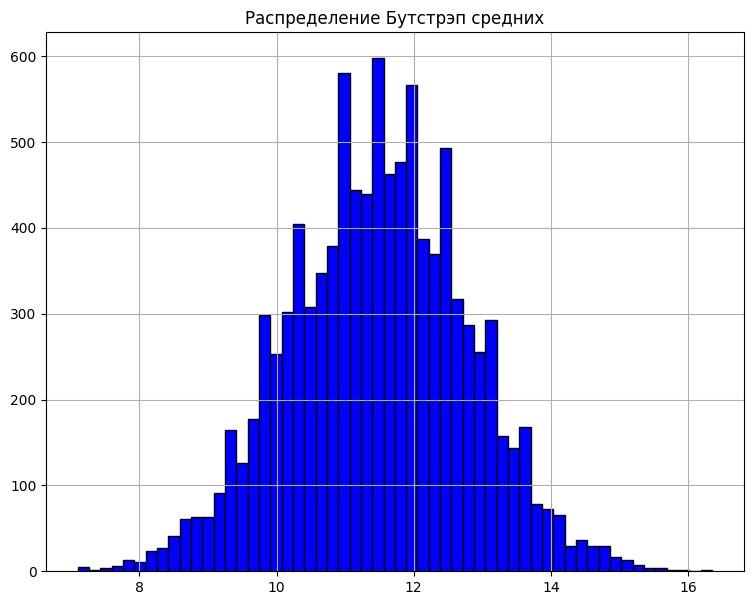

In [4]:
distr = pd.Series(boot_means)

plt.figure(figsize=(9,7))
plt.hist(distr,bins='auto', edgecolor='black',color='b')
plt.grid(True)
plt.title('Распределение Бутстрэп средних')
plt.show;

## __Смотрим результаты__

In [5]:
# Вывод результатов
print(f"Среднее значение: {mean_data}")
print(f"Стандартное отклонение бутстрэп-средних: {boot_std}")
print(f"95% Доверительный интервал: {confidence_interval}")

Среднее значение: 11.5
Стандартное отклонение бутстрэп-средних: 1.298
95% Доверительный интервал: [ 8.9 14. ]


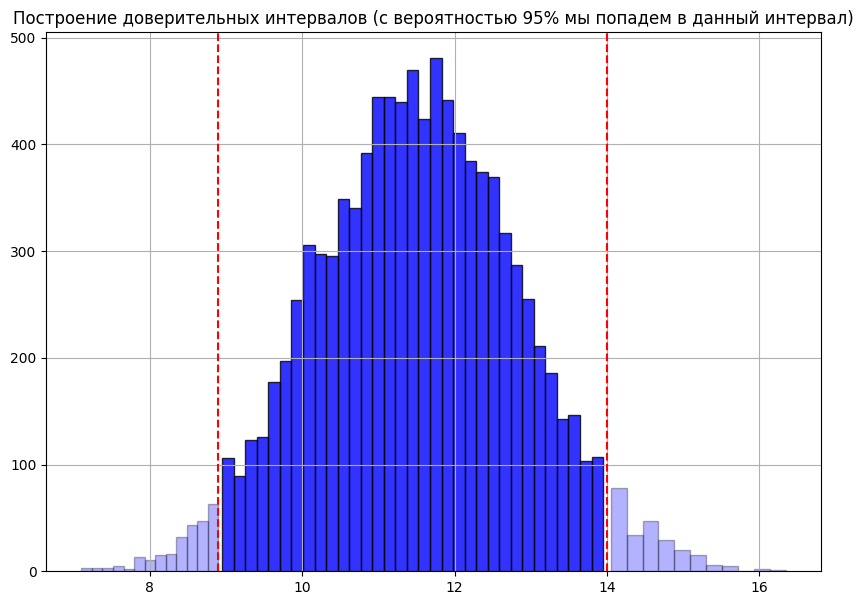

In [6]:
# Отбираем данные для средней части гистограммы
distr2 = []
for i in range(len(distr)):
  if confidence_interval[1] > distr[i] > confidence_interval[0]:
    distr2.append(distr[i])

distr3 = []
for i in range(len(distr)):
  if distr[i] <= confidence_interval[0]:
    distr3.append(distr[i])

distr4 = []
for i in range(len(distr)):
  if distr[i] > confidence_interval[1]:
    distr4.append(distr[i])

plt.figure(figsize=(10,7))
plt.hist(distr2, bins='auto', edgecolor='black', color='b',alpha=0.8)
plt.hist(distr3, bins='auto', edgecolor='black', color='b',alpha=0.3)
plt.hist(distr4, bins='auto', edgecolor='black', color='b',alpha=0.3)
plt.grid(True)
plt.title('Построение доверительных интервалов (с вероятностью 95% мы попадем в данный интервал)')


# Выделение доверительного интервала на графике

plt.axvline(confidence_interval[0], color = 'red', linestyle='--', label='Нижняя граница (2.5%)')
plt.axvline(confidence_interval[1], color = 'red', linestyle='--', label='Верхняя граница (97.5%)')
plt.show;

# Вывод:
С учетом репрезентативности выборки и результатов бутстрэп-анализа мы можем утверждать, что среднее время учебы студентов университета, с высокой вероятностью (95%), лежит в интервале от 8.95 до 14 часов ежедневно. Эти результаты предоставляют статистически обоснованную оценку истинного среднего времени учебы для генеральной совокупности студентов университета.